In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics


In [2]:
#import data
city_data_df=pd.read_csv("Resources/city_data.csv")
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
#import rider data
ride_data_df=pd.read_csv("Resources/ride_data.csv")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12
5,South Latoya,3/11/2019 12:26,9.52,2.000000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.930000e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.120000e+11
8,South Karenland,1/8/2019 3:28,35.09,8.000000e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.330000e+12


In [4]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
sum(city_data_df["type"]=="Urban")

66

In [12]:
sum(city_data_df["type"]=="Suburban")

36

In [13]:
sum(city_data_df["type"]=="Rural")

18

In [14]:
#merging data
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,2.000000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.930000e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.120000e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,8.000000e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.330000e+12,33,Urban


In [15]:
avg_fare=pyber_data_df["fare"].mean()
avg_fare

26.753111578947426

In [16]:
pyber_data_df.rename(columns={"type":"city_type"},inplace=True)
print(pyber_data_df.columns)

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'city_type'], dtype='object')


In [17]:
avg_fare_bygroup=pyber_data_df.groupby(["city_type"]).mean()["fare"]
avg_fare_bygroup

city_type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [18]:
x_axis=city_data_df["type"].unique()
x_axis

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [19]:
##fig, ax = plt.subplots()
##ax.scatter(x_axis,avg_fare_bygroup)

In [20]:
urban_cities_df=pyber_data_df[pyber_data_df["city_type"]=="Urban"]
urban_cities_df

,city,date,fare,ride_id,driver_count,city_type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2/14/2019 11:25,39.40,9.070000e+12,67,Urban
1621,Christopherfurt,3/13/2019 1:47,32.05,2.790000e+12,41,Urban
1622,Raymondhaven,3/20/2019 2:20,38.53,8.660000e+12,11,Urban
1623,Port Johnbury,3/26/2019 7:22,7.63,8.090000e+12,3,Urban


In [21]:
suburban_cities_df=pyber_data_df[pyber_data_df["city_type"]=="Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,city_type
1625,Barronchester,1/27/2019 3:08,27.79,6.650000e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.580000e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.670000e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.710000e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.270000e+12,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,3/2/2019 17:06,13.92,7.390000e+12,12,Suburban
2246,Lake Robertside,4/3/2019 3:27,12.76,1.300000e+12,4,Suburban
2247,Colemanland,1/10/2019 6:49,27.70,8.700000e+12,23,Suburban
2248,East Marymouth,2/12/2019 23:18,47.41,7.410000e+12,5,Suburban


In [22]:
rural_cities_df=pyber_data_df[pyber_data_df["city_type"]=="Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,city_type
2250,Randallchester,4/13/2019 11:13,43.22,1.080000e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.990000e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.420000e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.270000e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.020000e+12,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550000e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.020000e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.780000e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.260000e+12,4,Rural


In [23]:
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [24]:
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [25]:
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [26]:
avg_urban_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
avg_urban_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [27]:
avg_suburban_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
avg_suburban_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [28]:
avg_rural_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
avg_rural_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [29]:
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [30]:
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [31]:
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


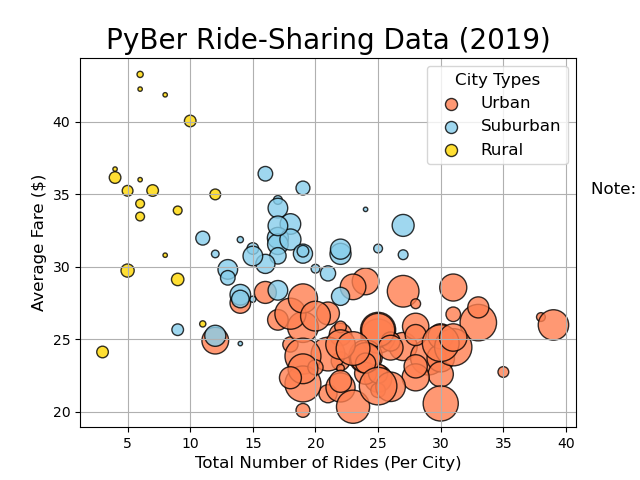

In [42]:
plt.scatter(urban_ride_count, avg_urban_fare,
           s=10*urban_driver_count, c="coral",
          edgecolor="black", linewidths=1,
          alpha=0.8, label="Urban")


In [43]:
plt.scatter(suburban_ride_count,avg_suburban_fare, 
           s=10*suburban_driver_count, c="skyblue",
          edgecolor="black", linewidths=1,
          alpha=0.8, label="Suburban")

In [44]:
plt.scatter(rural_ride_count, avg_rural_fare, 
           s=10*rural_driver_count, c="gold",
          edgecolor="black", linewidths=1,
          alpha=0.8, label="Rural")

In [45]:
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

In [46]:
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

In [47]:
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

In [49]:
# Save the figure.
plt.savefig("Analysis/Fig1.png")

In [53]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [54]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [55]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [56]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [57]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [58]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [59]:
suburban_ride_count.mode()

0    17
dtype: int64

In [60]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [61]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [62]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [63]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [67]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()
urban_drivers.mean()

36.67815384615385

In [68]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()
suburban_drivers.mean()

13.712

In [69]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()
rural_drivers.mean()

4.296

<IPython.core.display.Javascript object>


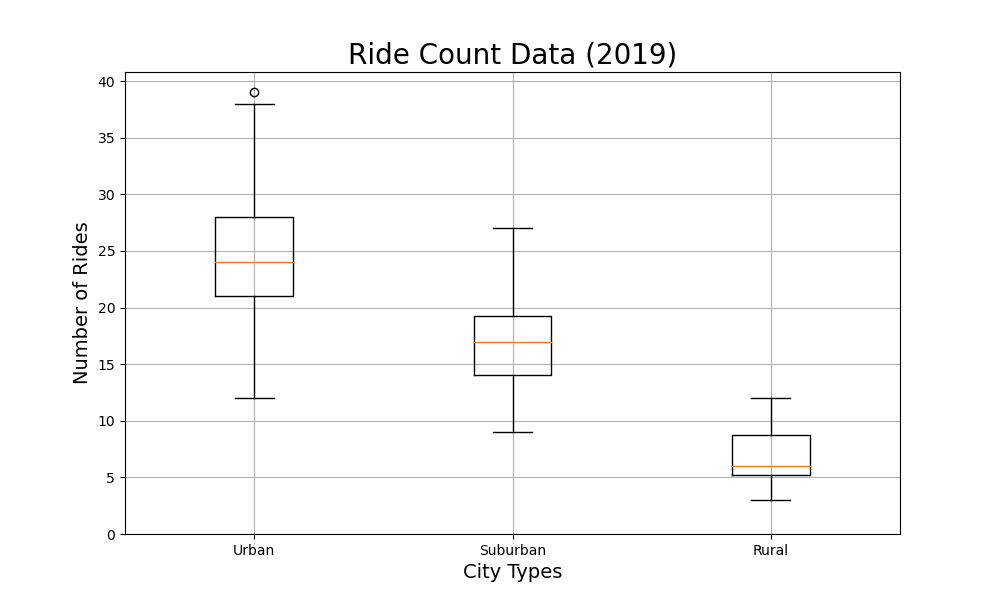

In [81]:
x_labels=["Urban","Suburban","Rural"]
ride_count_data=[urban_ride_count,suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 41, step=5.0))
ax.grid()
plt.show()


In [82]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [83]:
suburban_city_outlier = suburban_ride_count[suburban_ride_count==27].index[0]
print(f"{suburban_city_outlier} has the highest rider count.")

East Marymouth has the highest rider count.


In [84]:
rural_city_outlier = rural_ride_count[rural_ride_count==12].index[0]
print(f"{rural_city_outlier} has the highest rider count.")

Michaelberg has the highest rider count.


<IPython.core.display.Javascript object>


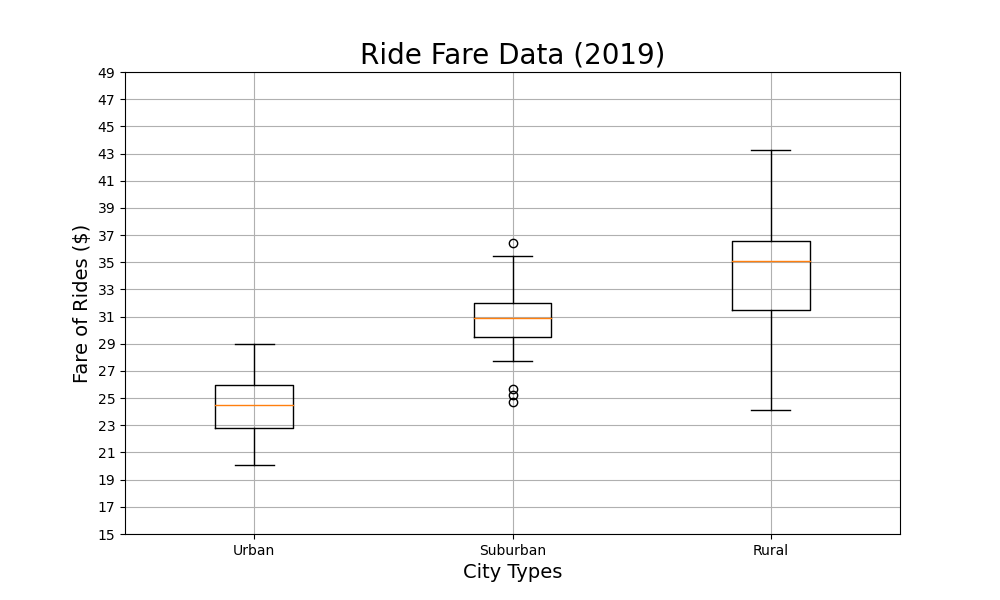

In [87]:
x_labels=["Urban","Suburban","Rural"]
ride_fare_data=[avg_urban_fare,avg_suburban_fare, avg_rural_fare]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare of Rides ($)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(15, 50, step=2.0))
ax.grid()
plt.show()

<IPython.core.display.Javascript object>


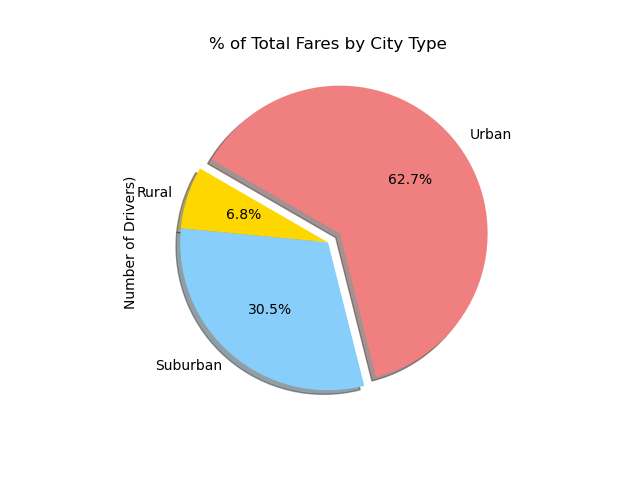

Summary Statistics


In [117]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban","Rural"]
city_drivers_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(city_drivers_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 85, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")


In [96]:
urban_drivers.describe()


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [97]:
suburban_drivers.describe()


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [98]:
rural_drivers.describe()

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [100]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["city_type"]).sum()["fare"]
sum_fares_by_type

city_type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [104]:
sum_fare_by_urban=pyber_data_df[pyber_data_df["city_type"]=="Urban"].sum()["fare"]
sum_fare_by_urban

39854.380000000005

In [105]:
sum_fare_by_suburban=pyber_data_df[pyber_data_df["city_type"]=="Suburban"].sum()["fare"]
sum_fare_by_suburban

19356.33

In [107]:
sum_fare_by_rural=pyber_data_df[pyber_data_df["city_type"]=="Rural"].sum()["fare"]
sum_fare_by_rural

4327.929999999999

In [108]:
total_fare=pyber_data_df["fare"].sum()
total_fare

63538.64

In [113]:
type_percentage=100*sum_fares_by_type/total_fare
type_percentage

city_type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [114]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percentage, labels=["Rural", "Suburban", "Urban"])
plt.show()

In [118]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

<IPython.core.display.Javascript object>


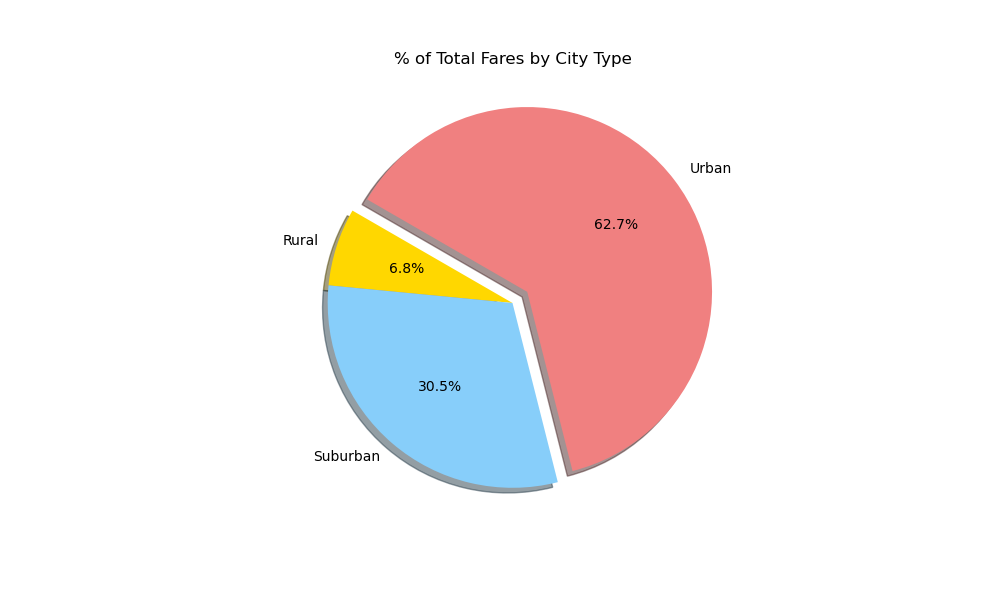

In [119]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [129]:
sum_rider_by_type = pyber_data_df.groupby(["city_type"]).count()["ride_id"]
sum_rider_by_type

city_type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [130]:
total_rider=pyber_data_df["ride_id"].count()
total_rider

2375

In [131]:
rider_percentages=100*sum_rider_by_type/total_rider
rider_percentages

city_type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

<IPython.core.display.Javascript object>


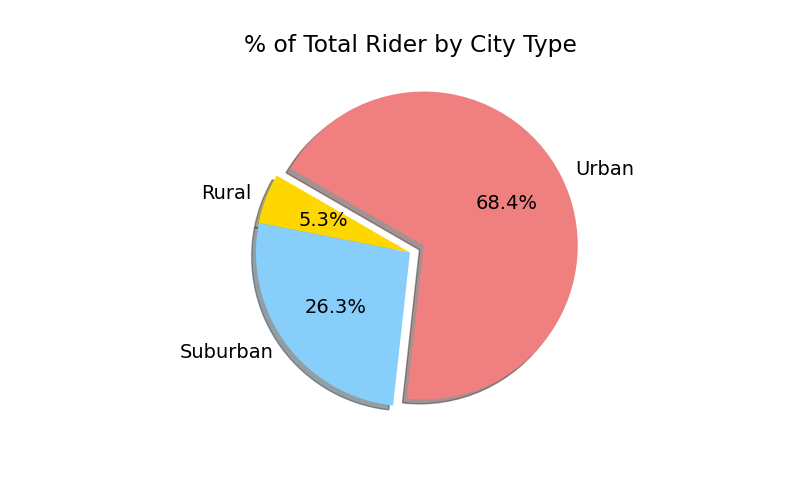

In [133]:
plt.subplots(figsize=(8, 5))
plt.pie(driver_percentages,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rider by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [128]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 *city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


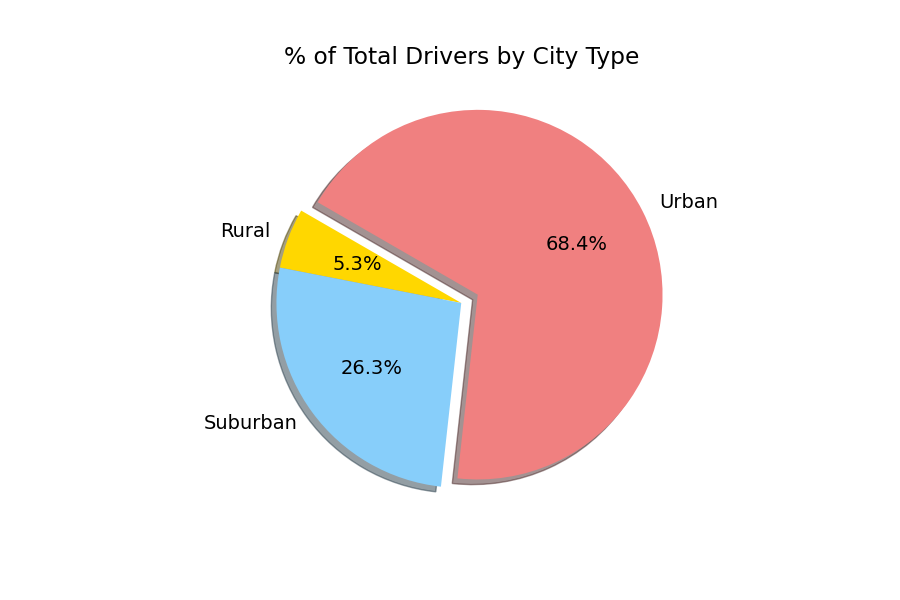

In [132]:
plt.subplots(figsize=(9, 6))
plt.pie(driver_percentages,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()